In [1]:
%matplotlib inline
import numpy as np
from netCDF4 import Dataset
from mpl_toolkits.basemap import Basemap, shiftgrid
import pandas as pd
from StringIO import StringIO
import matplotlib.pyplot as plt

/Users/dietmar/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


## Load grid data for locations of seabed uconformities and conformities

In [2]:
gridfile = Dataset('botvel_stats.nc','r')
x = gridfile.variables['xu_ocean'][:]
y = gridfile.variables['yu_ocean'][:]
u = gridfile.variables['ubar'][:,:]
v = gridfile.variables['vbar'][:,:]
uv = gridfile.variables['uvbar'][:,:]
uvstd = gridfile.variables['uvstd'][:,:]
gridfile.close()

hfile = Dataset('botvel_average.nc','r')
h = hfile.variables['hu'][:,:]
hfile.close()


#### testing the shiftgrid function - didn't get it to work
# # from mpl_toolkits.basemap import shiftgrid
# lon1 = shiftgrid(-180,u,x,start=True)
# # lon1 = shiftgrid(-180,v,x,start=True)
# # lon1 = shiftgrid(-180,uv,x,start=True)
# # lon1 = shiftgrid(-180,uvstd,x,start=True)
# # # print lon1

# converting the longitude into -180 to 180 format (probably not the best way to do this..)
# print x
for (i, item) in  enumerate(x):
    if item < -180:
        x[i] = item + 360  
# print x

# make a meshgrid
lon,lat = np.meshgrid(x,y)

clev = np.linspace(0,0.1,21)
klev = np.arange(1000,5000,2000)

In [3]:
# # file1 = 'unconformities_squares.txt'
# # file2 = 'unconformities_circles.txt'

# data1_df = pd.read_csv(file1,sep='\t',skiprows=(0),header=(0))
# data2_df = pd.read_csv(file2,sep='\t',skiprows=(0),header=(0))
# print(data1_df.columns)

# data1_df.columns[1:]
# numpydata1 = data1_df.as_matrix(columns=data1_df.columns[:])
# lat1 = numpydata1[:,0]
# lon1 = numpydata1[:,1]
# square = numpydata1[:,2]

# data2_df.columns[1:]
# numpydata2 = data2_df.as_matrix(columns=data2_df.columns[:])
# lat2 = numpydata2[:,0]
# lon2 = numpydata2[:,1]
# circle = numpydata2[:,2]

# posID1 = np.where(square > 0)
# negID1 = np.where(square < 0)

# posID2 = np.where(circle > 0)
# negID2 = np.where(circle < 0)

### Code to plot colourmap made in GMT in python

modified from http://osdir.com/ml/python-matplotlib-general/2008-12/msg00288.html


In [4]:
def gmtColormap(fileName):
    import colorsys
    import numpy as np
    
    f = open(fileName)
    
    lines = f.readlines()
    f.close()
    
    x = []
    r = []
    g = []
    b = []
    colorModel = "RGB"
    
    for l in lines:
        ls = l.split()
        if l[0] == "#":
            if ls[-1] == "HSV":
                colorModel = "HSV"
                continue
            else:
                continue
        if ls[0] == "B" or ls[0] == "F" or ls[0] == "N":
            pass
        else:
            x.append(float(ls[0]))
            r.append(float(ls[1]))
            g.append(float(ls[2]))
            b.append(float(ls[3]))
    
            xtemp = float(ls[4])
            rtemp = float(ls[5])
            gtemp = float(ls[6])
            btemp = float(ls[7])
            
            x.append(xtemp)
            r.append(rtemp)
            g.append(gtemp)
            b.append(btemp)
    
    nTable = len(r)
    x = np.array(x, np.float32)
    r = np.array(r, np.float32)
    g = np.array(g, np.float32)
    b = np.array(b, np.float32)
    if colorModel == "HSV":
        for i in range(r.shape[0]):
            rr, gg, bb = colorsys.hsv_to_rgb(r[i]/360., g[i], b[i])
            r[i] = rr
            g[i] = gg
            b[i] = bb
    if colorModel == "HSV":
        for i in range(r.shape[0]):
            rr, gg, bb = colorsys.hsv_to_rgb(r[i]/360., g[i], b[i])
            r[i] = rr
            g[i] = gg
            b[i] = bb
    if colorModel == "RGB":
        r = r/255.
        g = g/255.
        b = b/255.
        xNorm = (x - x[0])/(x[-1] - x[0])
        red = []
        blue = []
        green = []
    
        for i in range(len(x)):
            red.append([xNorm[i], r[i], r[i]])
            green.append([xNorm[i], g[i], g[i]])
            blue.append([xNorm[i], b[i], b[i]])
        print red
        colorDict = {"red": red, "green": green, "blue": blue}
        return (colorDict)


Make the colormap

In [5]:
from matplotlib.colors import LinearSegmentedColormap
cpt = gmtColormap('sed_rate.cpt')
palette = LinearSegmentedColormap('my_colormap', cpt)
# print palette

[[0.0, 0.78823531, 0.78823531], [0.083333336, 0.78823531, 0.78823531], [0.083333336, 0.63529414, 0.63529414], [0.16666667, 0.63529414, 0.63529414], [0.16666667, 0.57647061, 0.57647061], [0.25, 0.57647061, 0.57647061], [0.25, 0.46666667, 0.46666667], [0.33333334, 0.46666667, 0.46666667], [0.33333334, 0.0, 0.0], [0.41666666, 0.0, 0.0], [0.41666666, 0.0, 0.0], [0.5, 0.0, 0.0], [0.5, 0.0, 0.0], [0.58333331, 0.0, 0.0], [0.58333331, 0.3882353, 0.3882353], [0.66666669, 0.3882353, 0.3882353], [0.66666669, 0.58823532, 0.58823532], [0.75, 0.58823532, 0.58823532], [0.75, 0.7764706, 0.7764706], [0.83333331, 0.7764706, 0.7764706], [0.83333331, 1.0, 1.0], [0.91666669, 1.0, 1.0], [0.91666669, 1.0, 1.0], [1.0, 1.0, 1.0]]


## Import sediment rate grid

In [6]:
# import grid
f = Dataset('sed_rate_cm_per_ka.nc')

sedrate =  f.variables['z'][:]
lats = f.variables['lat'][:]
lons = f.variables['lon'][:]
lon2, lat2 = np.meshgrid(lons, lats)

## SEIND Ocean map with vel grid

may not be what you expect.  If it looks odd, your can either
adjust the map projection region to be consistent with your data, or
(if your data is on a global lat/lon grid) use the shiftgrid
function to adjust the data to be consistent with the map projection
region (see examples/contour_demo.py).

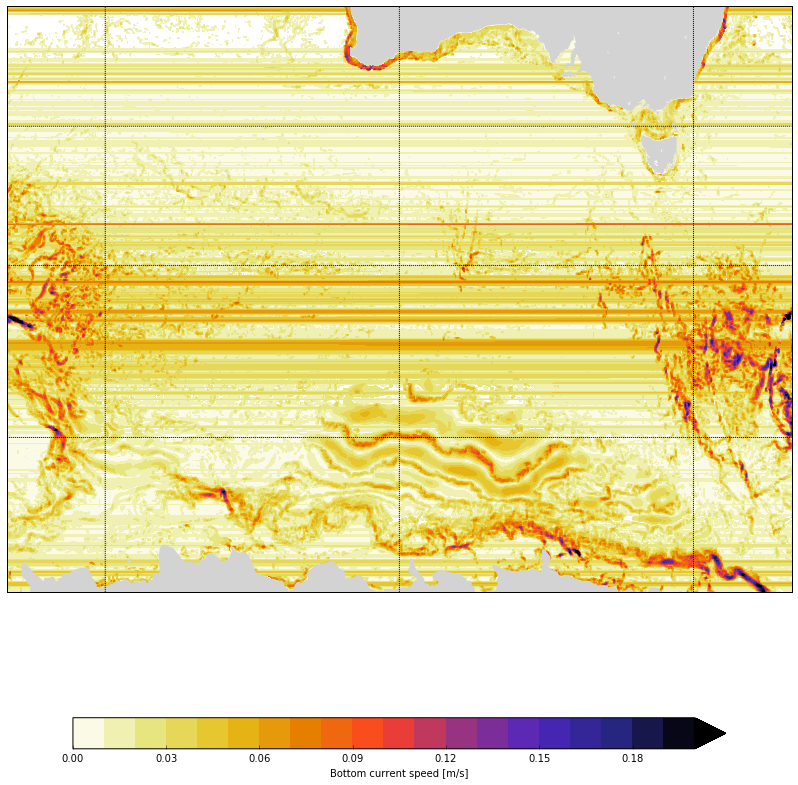

In [10]:
clev = np.linspace(0,0.2,21)
plt.figure(figsize=(18,15))

map = Basemap(projection='merc',llcrnrlat=-67,llcrnrlon=80,urcrnrlat=-30,urcrnrlon=160,resolution='i')
map.fillcontinents(color='lightgrey')

# set the grid up
gridX,gridY = 10,30
parallelGrid = np.arange(-90.0,90.0,gridX)
meridianGrid = np.arange(-180.0,180.0,gridY)

##### draw parallel and meridian grid, note labels are off. We have to manually create these.
map.drawparallels(parallelGrid,labels=[False,False,False,False])
map.drawmeridians(meridianGrid,labels=[False,False,False,False],labelstyle='+/-',fmt='%i')

X, Y = map(lon,lat) 
MC = map.contourf(X,Y,uv, cmap=plt.cm.CMRmap_r,levels=clev,extend='max',clim=(0,0.3))
# MC = map.contourf(X,Y,uv, cmap=plt.cm.BuGn,levels=clev,extend='max')

CB = plt.colorbar(MC, shrink=0.65, orientation='horizontal')
CB.set_label('Bottom current speed [m/s]')

## SEIND Ocean map

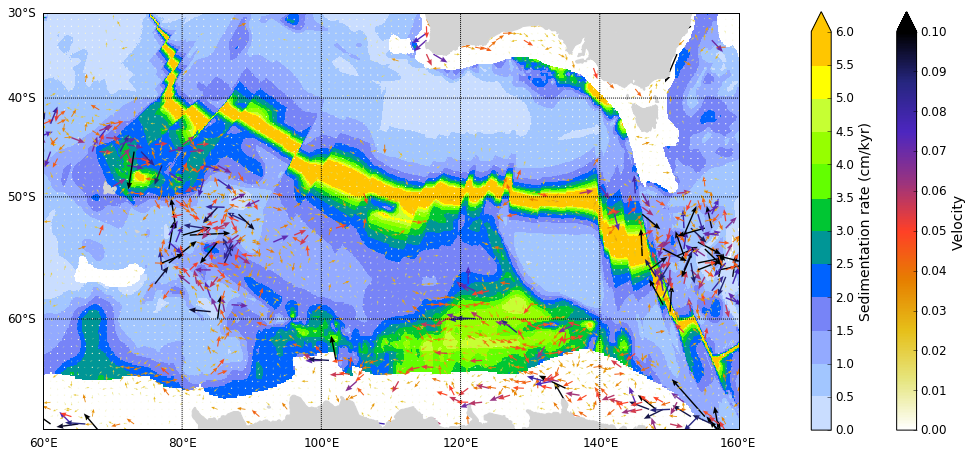

In [26]:
### rcParams are the default parameters for matplotlib
# import matplotlib as mpl
# mpl.rcParams['font.size'] = 14.
# mpl.rcParams['axes.labelsize'] = 12.
# mpl.rcParams['xtick.labelsize'] = 8.
# mpl.rcParams['ytick.labelsize'] = 8.


# plt.rc('text', usetex=True)
# plt.rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
plt.figure(figsize=(18,15))

map = Basemap(projection='merc',llcrnrlat=-67,llcrnrlon=60,urcrnrlat=-30,urcrnrlon=160,resolution='i')
map.fillcontinents(color='lightgrey')

# set the grid up
gridX,gridY = 10,20
parallelGrid = np.arange(-90.0,90.0,gridX)
meridianGrid = np.arange(-180.0,180.0,gridY)

# plot the sediment thickness grid
im1 = map.pcolormesh(lon2, lat2, sedrate, shading='flat', cmap=palette, latlon=True,alpha=1)
plt.clim(0,6)

# draw parallel and meridian grid
map.drawparallels(parallelGrid,labels=[True,False,False,False], fontsize=12)
map.drawmeridians(meridianGrid,labels=[False,False,False,True],fmt='%i',fontsize=12)

map.drawcoastlines(color='lightgrey')
X, Y = map(lon,lat) 
MC = map.quiver(X[::10,::10],Y[::10,::10],u[::10,::10],v[::10,::10],uv[::10,::10], minshaft=2,
                scale=3,width=0.002,headwidth=4,cmap=plt.cm.CMRmap_r,clim=(0,0.1))
# map.contour(X,Y,h,levels=klev,colors='k',linewidth=0.25) #CMRmap_r, gist_stern_r

# plot colorbar for velocity quivers
CB = plt.colorbar(MC, shrink=0.5, extend='max', pad=-0.05)
CB.ax.tick_params(labelsize=12) 
CB.set_label('Velocity', fontsize=14)
ticks = np.arange(0,6.5,0.5)
CB2 = plt.colorbar(im1, shrink=0.5, extend='max', orientation='vertical', ticks=ticks, pad=0.08)
CB2.set_label('Sedimentation rate (cm/kyr)', fontsize=14)
CB2.ax.tick_params(labelsize=12) 
plt.savefig('quiver_SEIND_NW.png',bbox_inches='tight',dpi=600)

plt.show()

## SEIND Ocean Kerguelen

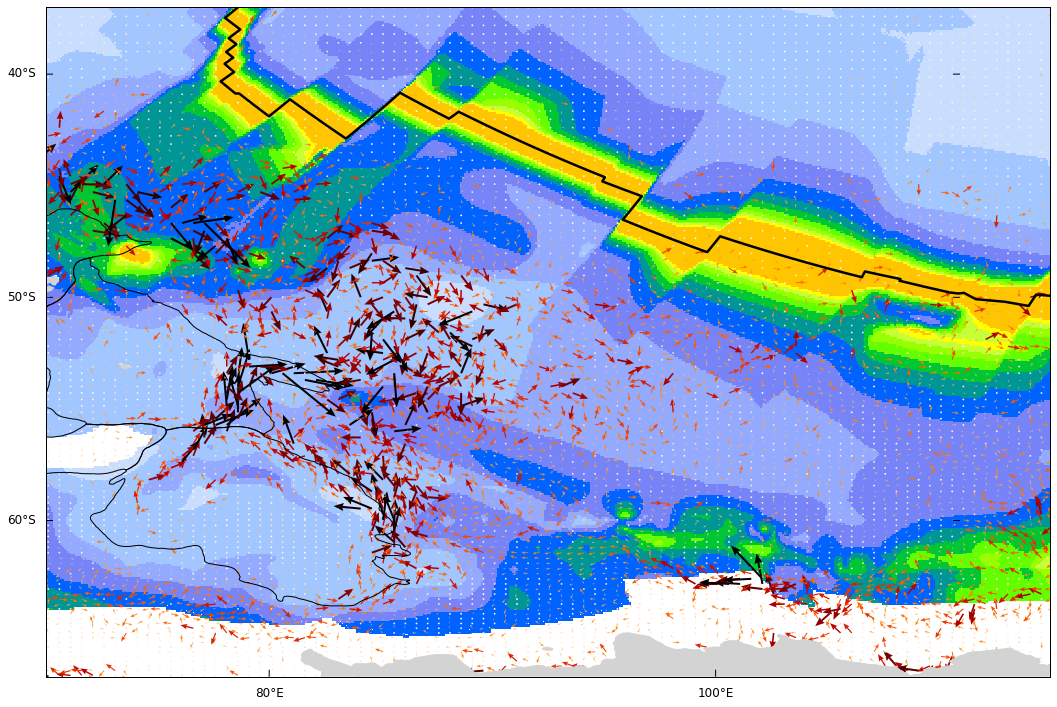

In [20]:
### rcParams are the default parameters for matplotlib
# import matplotlib as mpl
# mpl.rcParams['font.size'] = 14.
# mpl.rcParams['axes.labelsize'] = 12.
# mpl.rcParams['xtick.labelsize'] = 8.
# mpl.rcParams['ytick.labelsize'] = 8.

# plt.rc('text', usetex=True)
# plt.rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
plt.figure(figsize=(18,15))

map = Basemap(projection='cyl',llcrnrlat=-67,llcrnrlon=70,urcrnrlat=-37,urcrnrlon=115,resolution='i')

map.fillcontinents(color='lightgrey')

# set the grid up
gridX,gridY = 10,20
parallelGrid = np.arange(-90.0,90.0,gridX)
meridianGrid = np.arange(-180.0,180.0,gridY)

# plot the sediment thickness grid
im1 = map.pcolormesh(lon2, lat2, sedrate, shading='flat', cmap=palette, latlon=True,alpha=1)
plt.clim(0,6)

# draw parallel and meridian grid
# map.drawparallels(parallelGrid,labels=[True,False,False,False], fontsize=12)
# map.drawmeridians(meridianGrid,labels=[False,False,False,True],fmt='%i',fontsize=12)

map.drawparallels(parallelGrid,labels=[True,False,False,False], fontsize=12, linewidth=1.0, dashes=[7,900])
map.drawmeridians(meridianGrid,labels=[False,False,False,True],fmt='%i',fontsize=12, linewidth=1.0, dashes=[7,900])

map.drawcoastlines(color='lightgrey')
X, Y = map(lon,lat) 
MC = map.quiver(X[::5,::5],Y[::5,::5],u[::5,::5],v[::5,::5],uv[::5,::5], minshaft=2,
                scale=3.5,width=0.002,headwidth=4,cmap=plt.cm.gist_heat_r,clim=(0,0.1))
# MC = map.quiver(X[::5,::5],Y[::5,::5],u[::5,::5],v[::5,::5],uv[::5,::5], minshaft=2,
#               scale=3.5,width=0.002,headwidth=4,cmap=plt.cm.CMRmap_r,clim=(0,0.1))
# map.contour(X,Y,h,levels=klev,colors='k',linewidth=0.25) #CMRmap_r, gist_stern_r

# Plot mid-ocean ridge from Bird's plate boundaries (shapefile)
map.readshapefile('/Users/dietmar/Documents/Papers/in_prep/Dutkiewicz_sed_rate/sed_rate/Bird_plate_boundaries/Bird_2002','pb2002',linewidth=2.5,)

# Plot Outlines of LIPS
map.readshapefile('/Users/dietmar/Documents/GPlates/Data/EarthByte/LIPS/LIP_data/EarthByte_LIPS','lip2015',linewidth=1.0,)

# CB = plt.colorbar(MC, shrink=0.5, orientation='horizontal', extend='max', pad=-0.05)
# CB.ax.tick_params(labelsize=12) 
# CB.set_label('Bottom current velocity (m/s)', fontsize=14)
# ticks = np.arange(0,6.5,0.5)
# CB2 = plt.colorbar(im1, shrink=0.5, extend='max', orientation='horizontal', ticks=ticks, pad=0.08)
# CB2.set_label('Sedimentation rate (cm/kyr)', fontsize=14)
# CB2.ax.tick_params(labelsize=12) 

plt.savefig('quiver_SEIND_Kerguelen.png',bbox_inches='tight',dpi=600)

plt.show()

## SEIND Ocean Macquarie TJ

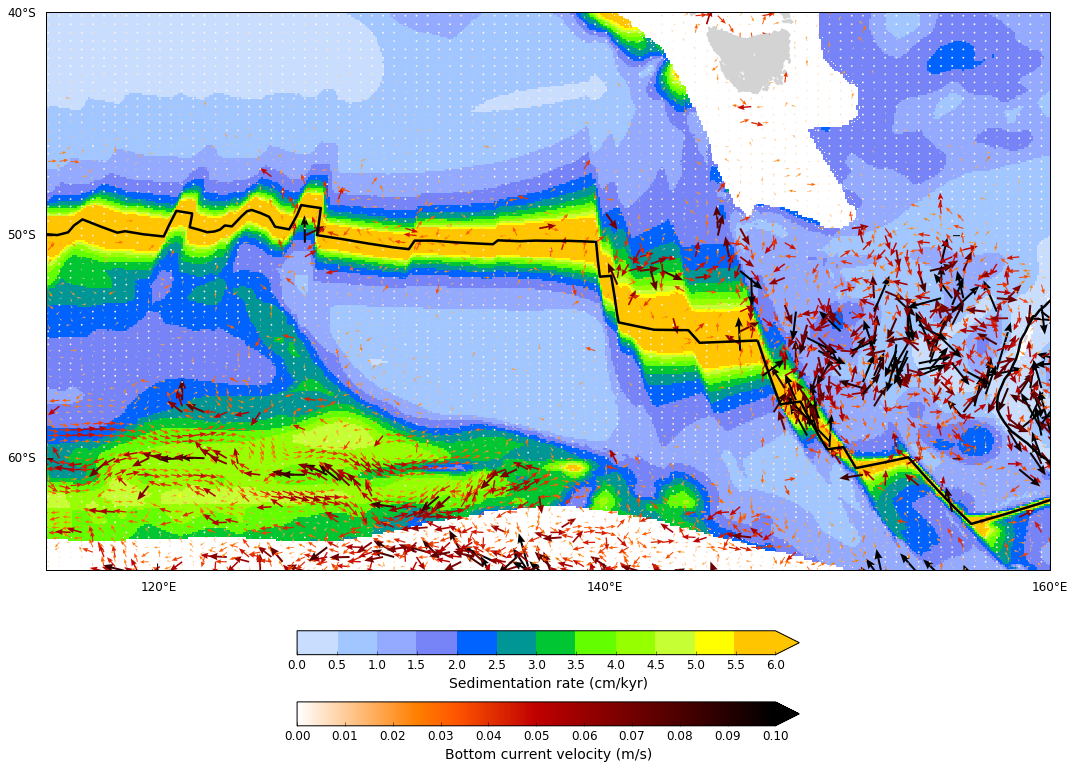

In [19]:
### rcParams are the default parameters for matplotlib
# import matplotlib as mpl
# mpl.rcParams['font.size'] = 14.
# mpl.rcParams['axes.labelsize'] = 12.
# mpl.rcParams['xtick.labelsize'] = 8.
# mpl.rcParams['ytick.labelsize'] = 8.

# plt.rc('text', usetex=True)
# plt.rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
plt.figure(figsize=(18,15))

map = Basemap(projection='cyl',llcrnrlat=-65,llcrnrlon=115,urcrnrlat=-40,urcrnrlon=160,resolution='i')

map.fillcontinents(color='lightgrey')

# set the grid up
gridX,gridY = 10,20
parallelGrid = np.arange(-90.0,90.0,gridX)
meridianGrid = np.arange(-180.0,180.0,gridY)

# plot the sediment thickness grid
im1 = map.pcolormesh(lon2, lat2, sedrate, shading='flat', cmap=palette, latlon=True,alpha=1)
plt.clim(0,6)

# draw parallel and meridian grid
# map.drawparallels(parallelGrid,labels=[True,False,False,False], fontsize=12)
# map.drawmeridians(meridianGrid,labels=[False,False,False,True],fmt='%i',fontsize=12)

map.drawparallels(parallelGrid,labels=[True,False,False,False], fontsize=12, linewidth=1.0, dashes=[7,900])
map.drawmeridians(meridianGrid,labels=[False,False,False,True],fmt='%i',fontsize=12, linewidth=1.0, dashes=[7,900])

map.drawcoastlines(color='lightgrey')
X, Y = map(lon,lat) 
MC = map.quiver(X[::5,::5],Y[::5,::5],u[::5,::5],v[::5,::5],uv[::5,::5], minshaft=2,
                scale=3.5,width=0.002,headwidth=4,cmap=plt.cm.gist_heat_r,clim=(0,0.1))
# map.contour(X,Y,h,levels=klev,colors='k',linewidth=0.25) #CMRmap_r, gist_stern_r

# Plot mid-ocean ridge from Bird's plate boundaries (shapefile)
map.readshapefile('/Users/dietmar/Documents/Papers/in_prep/Dutkiewicz_sed_rate/sed_rate/Bird_plate_boundaries/Bird_2002','pb2002',linewidth=2.5,)

# plot colorbar for velocity quivers
CB = plt.colorbar(MC, shrink=0.5, orientation='horizontal', extend='max', pad=-0.05)
CB.ax.tick_params(labelsize=12) 
CB.set_label('Bottom current velocity (m/s)', fontsize=14)
ticks = np.arange(0,6.5,0.5)
CB2 = plt.colorbar(im1, shrink=0.5, extend='max', orientation='horizontal', ticks=ticks, pad=0.08)
CB2.set_label('Sedimentation rate (cm/kyr)', fontsize=14)
CB2.ax.tick_params(labelsize=12) 
plt.savefig('quiver_SEIND_MacquarieTJ.png',bbox_inches='tight',dpi=600)

plt.show()

Streamline plot

In [34]:
# import matplotlib.mlab as mlab
# # make a regularly spaced grid
# # Size of regular grid
# ny, nx = 1800, 3600

# # Generate a regular grid to interpolate the data.
# xi = np.linspace(min(x), max(x), nx)
# yi = np.linspace(min(y), max(y), ny)
# xi, yi = np.meshgrid(xi, yi)

# zi = mlab.griddata(x,y,uv,xi,yi)


## to make the regridded outfile:
## cdo sinfon botvel_stats.nc  -- to see what the grid has
## cdo remapbil,r3601x1801 botvel_stats.nc out.nc  -- to make a new file "out.nc"

# gridfile = Dataset('out.nc','r')
# x = gridfile.variables['lon'][:]
# y = gridfile.variables['lat'][:]
# u = gridfile.variables['ubar'][:,:]
# v = gridfile.variables['vbar'][:,:]
# uv = gridfile.variables['uvbar'][:,:]
# uvstd = gridfile.variables['uvstd'][:,:]
# gridfile.close()

In [69]:
# lon,lat = np.meshgrid(x,y)

# # print lon
# # print lat
# # print u
# # print v

# # plot figure
# plt.figure(figsize=(18,15))

# map = Basemap(projection='merc',llcrnrlat=-67,llcrnrlon=60,urcrnrlat=-0,urcrnrlon=160,resolution='i')
# map.fillcontinents(color='lightgrey')

# # set the grid up
# gridX,gridY = 10,20
# parallelGrid = np.arange(-90.0,90.0,gridX)
# meridianGrid = np.arange(-180.0,180.0,gridY)

# # # plot the sediment thickness grid
# im1 = map.pcolormesh(lon, lat, uv, shading='flat', cmap=palette, latlon=True)
# # plt.clim(0,1350)

# # draw parallel and meridian grid
# map.drawparallels(parallelGrid,labels=[False,True,False,False])
# map.drawmeridians(meridianGrid,labels=[False,False,False,True],labelstyle='+/-',fmt='%i')

# map.drawcoastlines(color='lightgrey')

# X, Y = map(lon,lat) 
# MC = map.streamplot(X,Y,u,v, density=10,linewidth=1)
# # map.contour(X,Y,h,levels=klev,colors='k',linewidth=0.25) #CMRmap_r, gist_stern_r


# # CB = plt.colorbar(MC, shrink=0.5, extend='both')
# # CB2 = plt.colorbar(im1, shrink=0.5, extend='both')

# plt.show()

[ 80.1000061   80.20001221  80.29998779 ...,  79.80000305  79.90000153  80.        ]


ValueError: different number of values and points

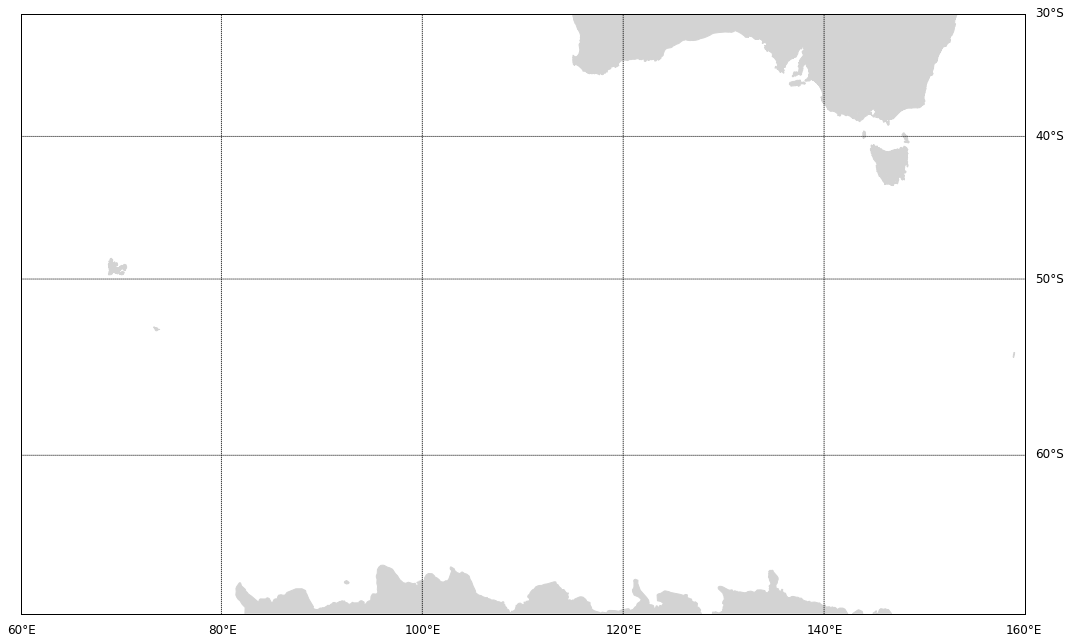

In [68]:
from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt
gridfile = Dataset('botvel_stats.nc','r')
x = gridfile.variables['xu_ocean'][:]
y = gridfile.variables['yu_ocean'][:]
u = gridfile.variables['ubar'][:,:]
v = gridfile.variables['vbar'][:,:]
uv = gridfile.variables['uvbar'][:,:]
uvstd = gridfile.variables['uvstd'][:,:]
gridfile.close()

# converting the longitude into -180 to 180 format (probably not the best way to do this..)
# print x
for (i, item) in  enumerate(x):
    if item < -180:
        x[i] = item + 360  

lon,lat = np.meshgrid(x,y)


#### MAKE FIGURE
plt.figure(figsize=(18,15))

map = Basemap(projection='merc',llcrnrlat=-67,llcrnrlon=60,urcrnrlat=-30,urcrnrlon=160,resolution='i')
map.fillcontinents(color='lightgrey')

# set the grid up
gridX,gridY = 10,20
parallelGrid = np.arange(-90.0,90.0,gridX)
meridianGrid = np.arange(-180.0,180.0,gridY)

# draw parallel and meridian grid
map.drawparallels(parallelGrid,labels=[False,True,False,False], fontsize=12)
map.drawmeridians(meridianGrid,labels=[False,False,False,True],fmt='%i',fontsize=12)

map.drawcoastlines(color='lightgrey')

from scipy.interpolate import griddata

# MC_streams = streams(ax,xx,yy,u,v,base_map=False):
x1 = np.linspace(x.min(), x.max(), 50)
y1 = np.linspace(y.min(), y.max(), 50)

xi, yi = np.meshgrid(x1,y1)

#then, interpolate your data onto this grid:

px = x.flatten()
py = y.flatten()
pu = u.flatten()
pv = v.flatten()
pspeed = speed.flatten()

# print x1
print x

x1 = np.c_[x1,y1]
xx = np.c_[X,Y]


z_interp = griddata(xi,u, xx)
# gv = griddata(zip(px,py), pv, (xi,yi))
# gspeed = griddata(zip(px,py), pspeed, (xi,yi))

# lw = 6*gspeed/np.nanmax(gspeed)
# #now, you can use x, y, gu, gv and gspeed in streamplot:

# if base_map:
#     x,y = ax(x,y)
#     xi,yi = ax(xi,yi)

# ax.contour(x,y,speed, colors='k', alpha=0.4)
# ax.plot(x,y,'-k',alpha=0.3)
# ax.plot(x.T,y.T,'-k',alpha=0.3)
# ax.plot(xi,yi,'-b',alpha=0.1)
# ax.plot(xi.T,yi.T,'-b',alpha=0.1)
# c = ax.streamplot(x,y,gu,gv, density=2,
#     linewidth=lw, color=gspeed, cmap=plt.cm.jet)


# # plot data
# X, Y = map(lon,lat) 
# MC = map.quiver(X[::10,::10],Y[::10,::10],u[::10,::10],v[::10,::10],uv[::10,::10], minshaft=2,
#                 scale=3,width=0.002,headwidth=4,cmap=plt.cm.CMRmap_r,clim=(0,0.1))
# # map.contour(X,Y,h,levels=klev,colors='k',linewidth=0.25) #CMRmap_r, gist_stern_r



plt.show()


## alternative

In [ ]:
plt.figure(figsize=(18,15))
# clev2 = np.linspace(0,0.1,21)
clev = np.linspace(0,0.08,17)
clev2 = np.linspace(0,0.1,21)

map = Basemap(projection='merc',llcrnrlat=-67,llcrnrlon=-280,urcrnrlat=-35,urcrnrlon=-190,resolution='i')
map.fillcontinents(color='lightgrey')

# set the grid up
gridX,gridY = 10,20
parallelGrid = np.arange(-90.0,90.0,gridX)
meridianGrid = np.arange(-180.0,180.0,gridY)

# draw parallel and meridian grid
map.drawparallels(parallelGrid,labels=[False,True,False,False])
map.drawmeridians(meridianGrid,labels=[False,False,False,True],labelstyle='+/-',fmt='%i')
# map.drawparallels(parallelGrid,labels=[False,False,False,False])
# map.drawmeridians(meridianGrid,labels=[False,False,False,False],labelstyle='+/-',fmt='%i')

map.drawcoastlines(color='lightgrey')

X, Y = map(lon,lat) 

MC = map.contourf(X,Y,uvstd, cmap=plt.cm.BuGn,levels=clev2,extend='both')
# MC2 = map.quiver(X[::4,::4],Y[::4,::4],u[::4,::4],v[::4,::4],uv[::4,::4],
#                scale=8,width = 0.0015,headwidth=1.5,cmap=plt.cm.gray_r,clim=(0,0.05))
MC2 = map.quiver(X[::6,::6],Y[::6,::6],u[::6,::6],v[::6,::6],uv[::6,::6],
                scale=4,width = 0.0015,headwidth=1.75,cmap=plt.cm.gray_r,clim=(0,0.05))

map.contour(X,Y,h,levels=klev,colors='0.5',linewidth=0.25) #CMRmap_r, gist_stern_r

# CB = plt.colorbar(MC, shrink=0.65, orientation='horizontal')
CB = plt.colorbar(MC, shrink=0.55)
CB.set_label('Bottom current speed [m/s]')

x,y = map(lon1[posID1]-360, lat1[posID1])
map.plot(x, y, 'ws', markersize=5)

x,y = map(lon1[negID1]-360, lat1[negID1])
map.plot(x, y, 'rs', markersize=5)

x,y = map(lon2[posID2]-360, lat2[posID2])
map.plot(x, y, 'wo', markersize=5)

x,y = map(lon2[negID2]-360, lat2[negID2])
map.plot(x, y, 'ro', markersize=5)

plt.savefig('quiver_SEIND_green.png',dpi=600)
plt.show()

## colour quiver plot example, mercindrical projection

In [ ]:
plt.figure(figsize=(18,15))
map = Basemap(projection='cyl',llcrnrlat=-65,llcrnrlon=-215,urcrnrlat=-50,urcrnrlon=-185,resolution='i')
map.drawcoastlines(color='lightgrey')
X, Y = map(lon,lat) 
MC = map.quiver(X[::3,::3],Y[::3,::3],u[::3,::3],v[::3,::3],uv[::3,::3],
                scale=5,width = 0.0015,headwidth=2.5,cmap=plt.cm.CMRmap_r,clim=(0,0.1))
map.contour(X,Y,h,levels=klev,colors='k',linewidth=0.25) #CMRmap_r, gist_stern_r
CB = plt.colorbar(MC, shrink=0.5, extend='both')
plt.savefig('quiver_Macquarie_TJ.png',dpi=600)
plt.show()

## SEIND Ridge W

In [ ]:
plt.figure(figsize=(18,15))
map = Basemap(projection='cyl',llcrnrlat=-60,llcrnrlon=-280,urcrnrlat=-40,urcrnrlon=-245,resolution='i')
map.drawcoastlines(color='lightgrey')
X, Y = map(lon,lat) 

MC = map.quiver(X[::3,::3],Y[::3,::3],u[::3,::3],v[::3,::3],uv[::3,::3],
                scale=4,width = 0.0018,headwidth=3.5,cmap=plt.cm.CMRmap_r,clim=(0,0.1))

map.contour(X,Y,h,levels=klev,colors='k',linewidth=0.25) #CMRmap_r, gist_stern_r

tmp = map.readshapefile('/Users/dietmar/Documents/Papers/in_prep/Dutkiewicz_sed_rate/sed_rate/Bird_plate_boundaries/Bird_2002','pb2002')

for line in map.pb2002:
    lonpb = []
    latpb = []
    for point in line:
        lonpb.append(point[0])
        latpb.append(point[1])
    x,y = map(np.asarray(lonpb)-360.,latpb)
    map.plot(x,y,'k',linewidth=3)

# set the grid up
gridX,gridY = 10,10
parallelGrid = np.arange(-90.0,90.0,gridX)
meridianGrid = np.arange(-180.0,180.0,gridY)

# draw parallel and meridian grid
map.drawparallels(parallelGrid,labels=[False,True,False,False])
map.drawmeridians(meridianGrid,labels=[False,False,False,True],labelstyle='+/-',fmt='%i')

x,y = map(lon1[posID1]-360, lat1[posID1])
# map.plot(x, y, 'ws', markersize=8)

x,y = map(lon1[negID1]-360, lat1[negID1])
# map.plot(x, y, 'ks', markersize=8)

x,y = map(lon2[posID2]-360, lat2[posID2])
# map.plot(x, y, 'wo', markersize=8)

x,y = map(lon2[negID2]-360, lat2[negID2])
# map.plot(x, y, 'ko', markersize=8)

CB = plt.colorbar(MC, shrink=0.5, extend='both')
plt.savefig('quiver_seind_w.png',dpi=600)
plt.show()

## alternative

In [ ]:
plt.figure(figsize=(18,15))
clev2 = np.linspace(0,0.1,11)

map = Basemap(projection='cyl',llcrnrlat=-65,llcrnrlon=-280,urcrnrlat=-45,urcrnrlon=-235,resolution='i')
map.drawcoastlines(color='lightgrey')
X, Y = map(lon,lat) 

MC = map.contourf(X,Y,uv, cmap=plt.cm.BuGn,levels=clev2,extend='both')
MC2 = map.quiver(X[::8,::8],Y[::8,::8],u[::8,::8],v[::8,::8],uv[::8,::8],
                scale=3,width = 0.002,headwidth=2.5,cmap=plt.cm.gray,clim=(0,1))

map.contour(X,Y,h,levels=klev,colors='k',linewidth=0.25) #CMRmap_r, gist_stern_r

# set the grid up
gridX,gridY = 10,10
parallelGrid = np.arange(-90.0,90.0,gridX)
meridianGrid = np.arange(-180.0,180.0,gridY)

# draw parallel and meridian grid
map.drawparallels(parallelGrid,labels=[False,True,False,False])
map.drawmeridians(meridianGrid,labels=[False,False,False,True],labelstyle='+/-',fmt='%i')

x,y = map(lon1[posID1]-360, lat1[posID1])
map.plot(x, y, 'ws', markersize=8)

x,y = map(lon1[negID1]-360, lat1[negID1])
map.plot(x, y, 'rs', markersize=8)

x,y = map(lon2[posID2]-360, lat2[posID2])
map.plot(x, y, 'wo', markersize=8)

x,y = map(lon2[negID2]-360, lat2[negID2])
map.plot(x, y, 'ro', markersize=8)

CB = plt.colorbar(MC, shrink=0.5, extend='both')
CB.set_label('Bottom current velocities [m/s]')

plt.savefig('quiver_SEIND_W_green.png',dpi=600)
plt.show()

## SEIND Ridge E

In [ ]:
plt.figure(figsize=(18,15))
map = Basemap(projection='cyl',llcrnrlat=-65,llcrnrlon=-235,urcrnrlat=-45,urcrnrlon=-200,resolution='i')
map.drawcoastlines(color='lightgrey')
X, Y = map(lon,lat) 

x,y = map(lon1[posID1]-360, lat1[posID1])
# map.plot(x, y, 'ws', markersize=8)

x,y = map(lon1[negID1]-360, lat1[negID1])
# map.plot(x, y, 'ks', markersize=8)

x,y = map(lon2[posID2]-360, lat2[posID2])
# map.plot(x, y, 'wo', markersize=8)

x,y = map(lon2[negID2]-360, lat2[negID2])
# map.plot(x, y, 'ko', markersize=8)

MC = map.quiver(X[::3,::3],Y[::3,::3],u[::3,::3],v[::3,::3],uv[::3,::3],
                scale=4,width = 0.0018,headwidth=2.5,cmap=plt.cm.CMRmap_r,clim=(0,0.1))

map.contour(X,Y,h,levels=klev,colors='k',linewidth=0.25) #CMRmap_r, gist_stern_r

# set the grid up
gridX,gridY = 10,10
parallelGrid = np.arange(-90.0,90.0,gridX)
meridianGrid = np.arange(-180.0,180.0,gridY)

# draw parallel and meridian grid
map.drawparallels(parallelGrid,labels=[False,True,False,False])
map.drawmeridians(meridianGrid,labels=[False,False,False,True],labelstyle='+/-',fmt='%i')

CB = plt.colorbar(MC, shrink=0.5, extend='both')
plt.savefig('quiver_seind_e.png',dpi=600)
plt.show()

## SEIND Ridge E b&w arrows

In [ ]:
plt.figure(figsize=(18,15))
map = Basemap(projection='cyl',llcrnrlat=-65,llcrnrlon=-235,urcrnrlat=-45,urcrnrlon=-200,resolution='i')
map.drawcoastlines(color='lightgrey')
X, Y = map(lon,lat) 

x,y = map(lon1[posID1]-360, lat1[posID1])
map.plot(x, y, 'ws', markersize=8)

x,y = map(lon1[negID1]-360, lat1[negID1])
map.plot(x, y, 'ks', markersize=8)

x,y = map(lon2[posID2]-360, lat2[posID2])
map.plot(x, y, 'wo', markersize=8)

x,y = map(lon2[negID2]-360, lat2[negID2])
map.plot(x, y, 'ko', markersize=8)

MC = map.quiver(X[::3,::3],Y[::3,::3],u[::3,::3],v[::3,::3],uv[::3,::3],
                scale=4,width = 0.0018,headwidth=2.5,cmap=plt.cm.gray_r,clim=(0.04,0.06))

# map.contour(X,Y,h,levels=klev,colors='k',linewidth=0.25) #CMRmap_r, gist_stern_r

# set the grid up
gridX,gridY = 10,10
parallelGrid = np.arange(-90.0,90.0,gridX)
meridianGrid = np.arange(-180.0,180.0,gridY)

# draw parallel and meridian grid
map.drawparallels(parallelGrid,labels=[False,True,False,False])
map.drawmeridians(meridianGrid,labels=[False,False,False,True],labelstyle='+/-',fmt='%i')

CB = plt.colorbar(MC, shrink=0.5, extend='both')
plt.savefig('quiver_seind_e_bw.png',dpi=600)
plt.show()

## W Pacific view

In [ ]:
plt.figure(figsize=(18,15))
map = Basemap(projection='merc',llcrnrlat=-70,llcrnrlon=-190,urcrnrlat=-40,urcrnrlon=-145,resolution='i')
map.drawcoastlines(color='lightgrey')
X, Y = map(lon,lat) 

x,y = map(lon1[posID1]-360, lat1[posID1])
map.plot(x, y, 'ws', markersize=8)

x,y = map(lon1[negID1]-360, lat1[negID1])
map.plot(x, y, 'ks', markersize=8)

x,y = map(lon2[posID2]-360, lat2[posID2])
map.plot(x, y, 'wo', markersize=8)

x,y = map(lon2[negID2]-360, lat2[negID2])
map.plot(x, y, 'ko', markersize=8)

x,y = map(lon1[posID1], lat1[posID1])
map.plot(x, y, 'ws', markersize=8)

x,y = map(lon1[negID1], lat1[negID1])
map.plot(x, y, 'ks', markersize=8)

x,y = map(lon2[posID2], lat2[posID2])
map.plot(x, y, 'wo', markersize=8)

x,y = map(lon2[negID2], lat2[negID2])
map.plot(x, y, 'ko', markersize=8)

MC = map.quiver(X[::4,::4],Y[::4,::4],u[::4,::4],v[::4,::4],uv[::4,::4],
                scale=4,width = 0.0018,headwidth=2.5,cmap=plt.cm.CMRmap_r,clim=(0,0.1))
map.contour(X,Y,h,levels=klev,colors='k',linewidth=0.25) #CMRmap_r, gist_stern_r

# set the grid up
gridX,gridY = 10,10
parallelGrid = np.arange(-90.0,90.0,gridX)
meridianGrid = np.arange(-180.0,180.0,gridY)

# draw parallel and meridian grid
map.drawparallels(parallelGrid,labels=[False,True,False,False])
map.drawmeridians(meridianGrid,labels=[False,False,False,True],labelstyle='+/-',fmt='%i')

CB = plt.colorbar(MC, shrink=0.5, extend='both')
plt.savefig('quiver_spac_w.png',dpi=600)
plt.show()

In [ ]:
## C Pacific view

In [ ]:
plt.figure(figsize=(18,15))
map = Basemap(projection='merc',llcrnrlat=-70,llcrnrlon=-145,urcrnrlat=-40,urcrnrlon=-100,resolution='i')
map.drawcoastlines(color='lightgrey')
X, Y = map(lon,lat) 

x,y = map(lon1[posID1], lat1[posID1])
map.plot(x, y, 'ws', markersize=8)

x,y = map(lon1[negID1], lat1[negID1])
map.plot(x, y, 'ks', markersize=8)

x,y = map(lon2[posID2], lat2[posID2])
map.plot(x, y, 'wo', markersize=8)

x,y = map(lon2[negID2], lat2[negID2])
map.plot(x, y, 'ko', markersize=8)

MC = map.quiver(X[::4,::4],Y[::4,::4],u[::4,::4],v[::4,::4],uv[::4,::4],
                scale=4,width = 0.0018,headwidth=2.5,cmap=plt.cm.CMRmap_r,clim=(0,0.1))
map.contour(X,Y,h,levels=klev,colors='k',linewidth=0.25) #CMRmap_r, gist_stern_r

# set the grid up
gridX,gridY = 10,10
parallelGrid = np.arange(-90.0,90.0,gridX)
meridianGrid = np.arange(-180.0,180.0,gridY)

# draw parallel and meridian grid
map.drawparallels(parallelGrid,labels=[False,True,False,False])
map.drawmeridians(meridianGrid,labels=[False,False,False,True],labelstyle='+/-',fmt='%i')

CB = plt.colorbar(MC, shrink=0.5, extend='both')
plt.savefig('quiver_spac_c.png',dpi=600)
plt.show()

## E Pacific view

In [ ]:
plt.figure(figsize=(18,15))
map = Basemap(projection='merc',llcrnrlat=-70,llcrnrlon=-100,urcrnrlat=-40,urcrnrlon=-55,resolution='i')
map.drawcoastlines(color='lightgrey')
X, Y = map(lon,lat) 

x,y = map(lon1[posID1], lat1[posID1])
map.plot(x, y, 'ws', markersize=8)

x,y = map(lon1[negID1], lat1[negID1])
map.plot(x, y, 'ks', markersize=8)

x,y = map(lon2[posID2], lat2[posID2])
map.plot(x, y, 'wo', markersize=8)

x,y = map(lon2[negID2], lat2[negID2])
map.plot(x, y, 'ko', markersize=8)

MC = map.quiver(X[::4,::4],Y[::4,::4],u[::4,::4],v[::4,::4],uv[::4,::4],
                scale=4,width = 0.0018,headwidth=2.5,cmap=plt.cm.CMRmap_r,clim=(0,0.1))
map.contour(X,Y,h,levels=klev,colors='k',linewidth=0.25) #CMRmap_r, gist_stern_r

# set the grid up
gridX,gridY = 10,10
parallelGrid = np.arange(-90.0,90.0,gridX)
meridianGrid = np.arange(-180.0,180.0,gridY)

# draw parallel and meridian grid
map.drawparallels(parallelGrid,labels=[False,True,False,False])
map.drawmeridians(meridianGrid,labels=[False,False,False,True],labelstyle='+/-',fmt='%i')

CB = plt.colorbar(MC, shrink=0.5, extend='both')
plt.savefig('quiver_spac_e.png',dpi=600)
plt.show()

## West S Atlantic (Scotia Sea) view

In [ ]:
plt.figure(figsize=(18,15))
map = Basemap(projection='merc',llcrnrlat=-75,llcrnrlon=-55,urcrnrlat=-40,urcrnrlon=-10,resolution='i')
map.drawcoastlines(color='lightgrey')
X, Y = map(lon,lat) 

x,y = map(lon1[posID1], lat1[posID1])
map.plot(x, y, 'ws', markersize=8)

x,y = map(lon1[negID1], lat1[negID1])
map.plot(x, y, 'ks', markersize=8)

x,y = map(lon2[posID2], lat2[posID2])
map.plot(x, y, 'wo', markersize=8)

x,y = map(lon2[negID2], lat2[negID2])
map.plot(x, y, 'ko', markersize=8)

MC = map.quiver(X[::4,::4],Y[::4,::4],u[::4,::4],v[::4,::4],uv[::4,::4],
                scale=4,width = 0.0018,headwidth=2.5,cmap=plt.cm.CMRmap_r,clim=(0,0.1))
map.contour(X,Y,h,levels=klev,colors='k',linewidth=0.25) #CMRmap_r, gist_stern_r

# set the grid up
gridX,gridY = 10,10
parallelGrid = np.arange(-90.0,90.0,gridX)
meridianGrid = np.arange(-180.0,180.0,gridY)

# draw parallel and meridian grid
map.drawparallels(parallelGrid,labels=[False,True,False,False])
map.drawmeridians(meridianGrid,labels=[False,False,False,True],labelstyle='+/-',fmt='%i')

CB = plt.colorbar(MC, shrink=0.5, extend='both')
plt.savefig('quiver_scotia.png',dpi=600)
plt.show()

## East S Atlantic (Lazarev Sea) view

In [ ]:
plt.figure(figsize=(18,15))
map = Basemap(projection='merc',llcrnrlat=-70,llcrnrlon=-10,urcrnrlat=-40,urcrnrlon=35,resolution='i')
map.drawcoastlines(color='lightgrey')
X, Y = map(lon,lat) 

x,y = map(lon1[posID1], lat1[posID1])
map.plot(x, y, 'ws', markersize=8)

x,y = map(lon1[negID1], lat1[negID1])
map.plot(x, y, 'ks', markersize=8)

x,y = map(lon2[posID2], lat2[posID2])
map.plot(x, y, 'wo', markersize=8)

x,y = map(lon2[negID2], lat2[negID2])
map.plot(x, y, 'ko', markersize=8)

MC = map.quiver(X[::4,::4],Y[::4,::4],u[::4,::4],v[::4,::4],uv[::4,::4],
                scale=4,width = 0.0018,headwidth=2.5,cmap=plt.cm.CMRmap_r,clim=(0,0.1))
map.contour(X,Y,h,levels=klev,colors='k',linewidth=0.25) #CMRmap_r, gist_stern_r

# set the grid up
gridX,gridY = 10,10
parallelGrid = np.arange(-90.0,90.0,gridX)
meridianGrid = np.arange(-180.0,180.0,gridY)

# draw parallel and meridian grid
map.drawparallels(parallelGrid,labels=[False,True,False,False])
map.drawmeridians(meridianGrid,labels=[False,False,False,True],labelstyle='+/-',fmt='%i')

CB = plt.colorbar(MC, shrink=0.5, extend='both')
plt.savefig('quiver_weddell.png',dpi=600)
plt.show()

## SWIND Ocean view

In [ ]:
plt.figure(figsize=(18,15))
map = Basemap(projection='merc',llcrnrlat=-70,llcrnrlon=35,urcrnrlat=-40,urcrnrlon=80,resolution='i')
map.drawcoastlines(color='lightgrey')
X, Y = map(lon,lat) 

x,y = map(lon1[posID1], lat1[posID1])
map.plot(x, y, 'ws', markersize=8)

x,y = map(lon1[negID1], lat1[negID1])
map.plot(x, y, 'ks', markersize=8)

x,y = map(lon2[posID2], lat2[posID2])
map.plot(x, y, 'wo', markersize=8)

x,y = map(lon2[negID2], lat2[negID2])
map.plot(x, y, 'ko', markersize=8)

MC = map.quiver(X[::4,::4],Y[::4,::4],u[::4,::4],v[::4,::4],uv[::4,::4],
                scale=4,width = 0.0018,headwidth=2.5,cmap=plt.cm.CMRmap_r,clim=(0,0.1))
map.contour(X,Y,h,levels=klev,colors='k',linewidth=0.25) #CMRmap_r, gist_stern_r

# set the grid up
gridX,gridY = 10,10
parallelGrid = np.arange(-90.0,90.0,gridX)
meridianGrid = np.arange(-180.0,180.0,gridY)

# draw parallel and meridian grid
map.drawparallels(parallelGrid,labels=[False,True,False,False])
map.drawmeridians(meridianGrid,labels=[False,False,False,True],labelstyle='+/-',fmt='%i')

CB = plt.colorbar(MC, shrink=0.5, extend='both')
plt.savefig('quiver_swind.png',dpi=600)
plt.show()